In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pysde import integrators, schemes, stochastic_integrals, storages

In [2]:
# Settings for SDE Model
variable_dim = 2
noise_dim = 2

def drift(current_state: np.ndarray, current_time: float):
    return -current_state

def diffusion(current_state: np.ndarray, current_time: float):
    return np.ones((current_state.shape[0], current_state.shape[0], current_state.shape[1]))

# Settings for integration
start_time=0
step_size=1e-3
num_steps=501
initial_state=np.array([[1, 0],
                        [0, 1]])

# Settings for stochastic integral generation
seed = 0

# Settings for storage
chunk_size = 100
save_directory = 'test_dir/data'

In [3]:
# Stochastic integral generator
stochastic_integral = stochastic_integrals.ItoStochasticIntegral(seed)

# Integration scheme, equipped with SDE model and stochastic integral generator
scheme = schemes.ExplicitEulerMaruyamaScheme(noise_dim,
                                             variable_dim,
                                             drift,
                                             diffusion,
                                             stochastic_integral)

# Storage model
storage = storages.NumpyStorage(save_directory)
#storage = storages.ZarrChunkwiseStorage(save_directory, chunk_size)

# Outer loop integrator
integrator = integrators.StaticIntegrator(scheme, storage)

# Solve SDE
time_array, result_array = integrator.run(initial_state, start_time, step_size, num_steps)

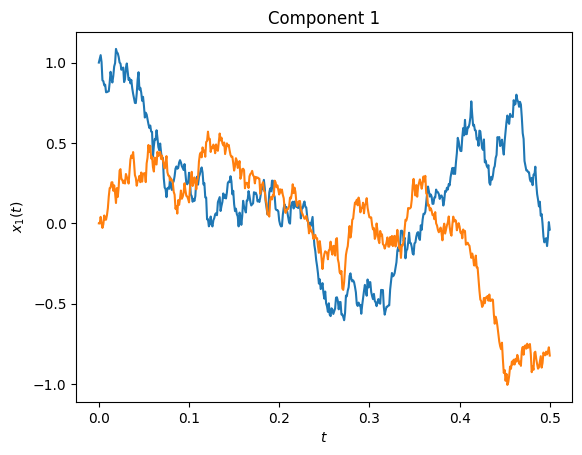

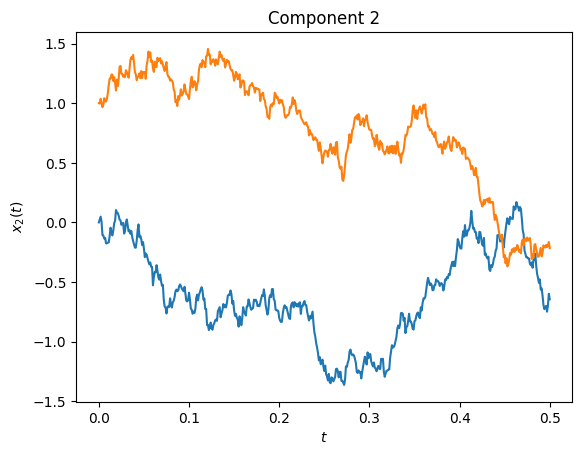

In [4]:
# Plot trajectories
num_components = result_array.shape[0]
num_trajectories = result_array.shape[1]

for i in range(num_components):
    _, ax = plt.subplots()
    ax.set_title(f"Component {i+1}")
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(rf"$x_{{{i+1}}}(t)$")

    for j in range(num_trajectories):
        ax.plot(time_array[:], result_array[i, j, :])